In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Problem 1

iter                   xk                          fk                method
----------------------------------------------------------------------------------
  0        -4.00000000e+00    0.00000000e+00       1.46000000e+02        start
  1        -3.99004771e+00    -9.75714240e-04       1.44982658e+02        Steepest
  2        -3.98009571e+00    -1.95430441e-03       1.43980348e+02        Steepest
  3        -3.97014400e+00    -2.93580797e-03       1.42992975e+02        Steepest
  4        -3.96019257e+00    -3.92026359e-03       1.42020443e+02        Steepest
  5        -3.95024144e+00    -4.90771124e-03       1.41062658e+02        Steepest
  6        -3.94029062e+00    -5.89819227e-03       1.40119525e+02        Steepest
  7        -3.93034010e+00    -6.89174944e-03       1.39190949e+02        Steepest
  8        -3.92038989e+00    -7.88842699e-03       1.38276836e+02        Steepest
  9        -3.91044000e+00    -8.88827078e-03       1.37377091e+02        Steepest
 10        -3.9

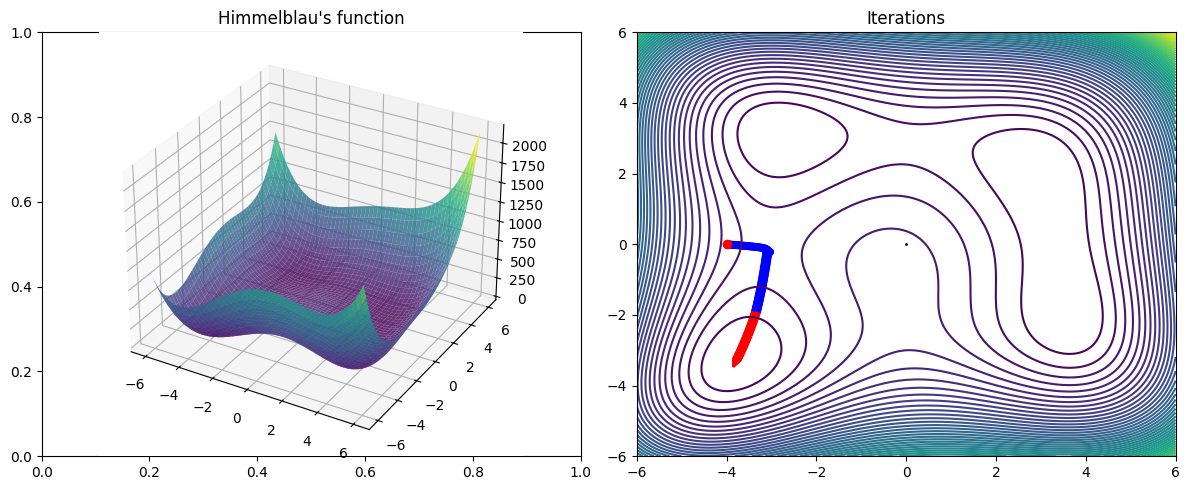

In [ ]:
# Himmelblau's function

def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def gradf(x, y):
    df_dx = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
    df_dy = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
    return np.array([df_dx, df_dy])

def hessf(x, y):
    d2f_dx2 = 12*x**2 + 4*y - 42
    d2f_dy2 = 12*y**2 + 4*x - 26
    d2f_dxdy = 4*(x + y)
    return np.array([[d2f_dx2, d2f_dxdy],
                     [d2f_dxdy, d2f_dy2]])


# Check if Hessian is positive definite

def pos_def(H):
    return np.all(np.linalg.eigvals(H) > 0)


# Initialization

xk = np.array([-4.0, 0.0])   # start near a saddle
alpha = 0.01                 # small step for stability
fk = f(xk[0], xk[1])
k = 0

# Plot setup

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0] = plt.subplot(121, projection='3d')
ax[0].plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax[0].set_title("Himmelblau's function")
ax[1] = plt.subplot(122)
ax[1].contour(X, Y, Z, levels=60)
ax[1].plot(0, 0, 'ko', markersize=1)
ax[1].plot(xk[0], xk[1], 'ro')
ax[1].set_title("Iterations")


# Iteration header

print("iter                   xk                          fk                method")
print("----------------------------------------------------------------------------------")
print(f"{k:3d}        {xk[0]:3.8e}    {xk[1]:3.8e}       {fk:3.8e}        start")


# Iteration loop

KeepIterate = True
while KeepIterate:
    gradfk = gradf(xk[0], xk[1])
    hessfk = hessf(xk[0], xk[1])

    # Choose direction
    if pos_def(hessfk):
        pk = -np.linalg.solve(hessfk, gradfk)
        method = "Newton"
        color = 'r'
    else:
        pk = -gradfk
        method = "Steepest"
        color = 'b'

    # Normalize direction
    pk = pk / np.linalg.norm(pk)

    # Take a step
    xknew = xk + alpha * pk
    fktest = f(xknew[0], xknew[1])

    # Check if function decreases
    if fktest < fk:
        ax[1].arrow(xk[0], xk[1], alpha*pk[0], alpha*pk[1],
                    head_width=0.15, head_length=0.2, fc=color, ec=color, linewidth=1.5)

        k += 1
        xk = xknew
        fk = fktest
        print(f"{k:3d}        {xk[0]:3.8e}    {xk[1]:3.8e}       {fk:3.8e}        {method}")
    else:
        KeepIterate = False

plt.tight_layout()
plt.show()


# Problem 2

## Armijo Backtracking

iter            xk                yk                 fk               alpha_k
-------------------------------------------------------------------------------------------
  0     -1.00000000e+00     +1.00000000e+00      1.00000000e+00        -
  1        -2.92893219e-01    2.92893219e-01       8.57864376e-02       1.000e+00
  2        6.06601718e-02    -6.06601718e-02       3.67965644e-03       5.000e-01
  3        -2.77281759e-02    2.77281759e-02       7.68851737e-04       1.250e-01
  4        1.64659980e-02    -1.64659980e-02       2.71129089e-04       6.250e-02
  5        -5.63108896e-03    5.63108896e-03       3.17091628e-05       3.125e-02
  6        5.41745450e-03    -5.41745450e-03       2.93488133e-05       1.562e-02
  7        -1.06817228e-04    1.06817228e-04       1.14099203e-08       7.812e-03
  8        6.58162631e-05    -6.58162631e-05       4.33178049e-09       2.441e-04
  9        -2.05004826e-05    2.05004826e-05       4.20269789e-10       1.221e-04
 10        1.078703

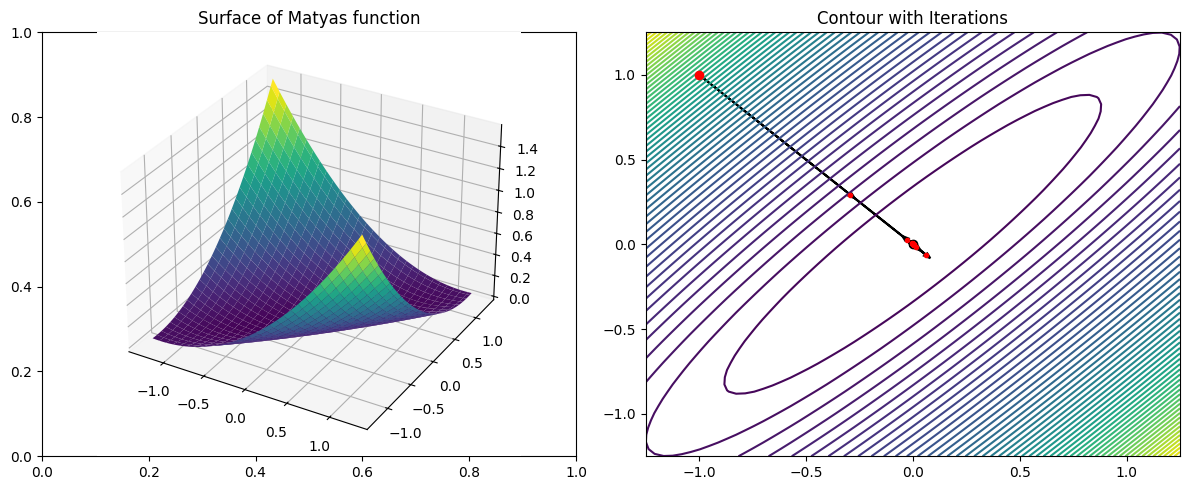

In [ ]:
# Objective function and gradient

def f(x, y):
    return 0.26*(x**2 + y**2) - 0.48*x*y   # Matyas function

def gradf(x, y):
    df_dx = 0.52*x - 0.48*y
    df_dy = 0.52*y - 0.48*x
    return np.array([df_dx, df_dy])


# Initialization

xk = np.array([-1, 1])   # initial point
fk = f(xk[0], xk[1])
k = 0

alpha_init = 1.0       # initial trial step length
rho = 0.5              # reduction factor
c = 1e-4               # Armijo condition constant


# Plot setup

x = np.linspace(-1.25, 1.25, 60)
y = np.linspace(-1.25, 1.25, 60)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0] = plt.subplot(121, projection='3d')
ax[0].plot_surface(X, Y, Z, cmap='viridis')
ax[0].set_title("Surface of Matyas function")
ax[1] = plt.subplot(122)
ax[1].contour(X, Y, Z, levels=60)
ax[1].plot(0, 0, 'ko', markersize=6)
ax[1].plot(xk[0], xk[1], 'ro')
ax[1].set_title("Contour with Iterations")

# Iteration header

print("iter            xk                yk                 fk               alpha_k")
print("-------------------------------------------------------------------------------------------")
print(f"{k:3d}     {xk[0]:+3.8e}     {xk[1]:+3.8e}      {fk:3.8e}        {'-'}")


# Iteration loop

KeepIterate = True
while KeepIterate:
    gradfk = gradf(xk[0], xk[1])
    pk = -gradfk / np.linalg.norm(gradfk)  # normalized steepest descent direction

    # Backtracking line search to find αₖ
    alpha = alpha_init
    while f(xk[0] + alpha*pk[0], xk[1] + alpha*pk[1]) > fk + c * alpha * np.dot(gradfk, pk):
        alpha *= rho  # shrink alpha until Armijo condition satisfied

    # Take step
    xknew = xk + alpha * pk
    fktest = f(xknew[0], xknew[1])

    # Stop if function increases
    if fktest < fk:
        ax[1].plot(xknew[0], xknew[1], 'ro', markersize=3)
        ax[1].arrow(xk[0], xk[1], alpha*pk[0], alpha*pk[1],
                    head_width=0.02, head_length=0.03, fc='k', ec='k', linewidth=1.5)

        k += 1
        xk = xknew
        fk = fktest
        print(f"{k:3d}        {xk[0]:3.8e}    {xk[1]:3.8e}       {fk:3.8e}       {alpha:3.3e}")
    else:
        KeepIterate = False  # stops when function stops decreasing

plt.tight_layout()
plt.show()


## Harmonic decay

iter            xk                yk                 fk               alpha_k
-------------------------------------------------------------------------------------------
  0     +0.00000000e+00     +2.50000000e+00      6.26000000e+02        -
  1        1.59998720e-03    2.10000320e+00       4.41997071e+02       4.000e-01
  2        4.49235342e-03    1.73637834e+00       3.02485001e+02       3.636e-01
  3        9.39782715e-03    1.40308110e+00       1.97820168e+02       3.333e-01
  4        1.73509508e-02    1.09549160e+00       1.20909832e+02       3.077e-01
  5        2.98174395e-02    8.10049415e-01       6.64152990e+01       2.857e-01
  6        4.88686001e-02    5.44064144e-01       3.02459403e+01       2.667e-01
  7        7.75029685e-02    2.95709412e-01       9.24376632e+00       2.500e-01
  8        1.20719472e-01    6.44181332e-02       1.02158607e+00       2.353e-01


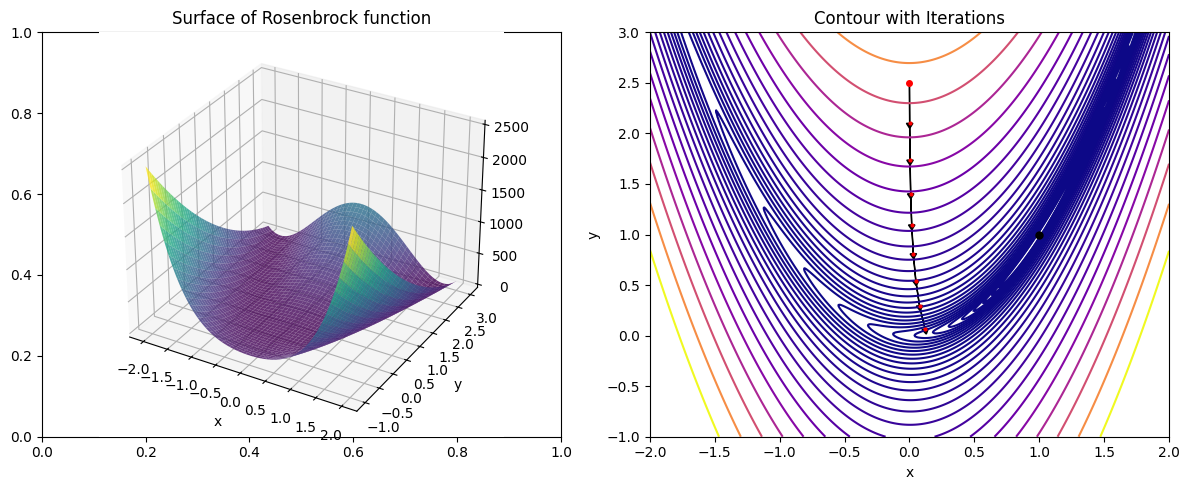

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function and its gradient
def f(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

def gradf(x, y):
    df_dx = -2*(1 - x) - 400*x*(y - x**2)
    df_dy = 200*(y - x**2)
    return np.array([df_dx, df_dy])

# Initialization
xk = np.array([0, 2.5])   # standard starting point for Rosenbrock
fk = f(xk[0], xk[1])
k = 0

alpha0 = 0.4   # initial step size
beta = 0.1      # decay rate
max_iter = 1000
tol = 1e-6

# Plot setup
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0] = plt.subplot(121, projection='3d')
ax[0].plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax[0].set_title("Surface of Rosenbrock function")
ax[0].set_xlabel('x'); ax[0].set_ylabel('y')

ax[1] = plt.subplot(122)
ax[1].contour(X, Y, Z, levels=np.logspace(-1, 3, 30), cmap='plasma')
ax[1].plot(1, 1, 'ko', markersize=5)  # true minimum at (1,1)
ax[1].plot(xk[0], xk[1], 'ro', markersize=4)
ax[1].set_title("Contour with Iterations")
ax[1].set_xlabel('x'); ax[1].set_ylabel('y')

# Iteration header
print("iter            xk                yk                 fk               alpha_k")
print("-------------------------------------------------------------------------------------------")
print(f"{k:3d}     {xk[0]:+3.8e}     {xk[1]:+3.8e}      {fk:3.8e}        {'-'}")

# Iteration loop
while k < max_iter:
    gradfk = gradf(xk[0], xk[1])
    pk = -gradfk / np.linalg.norm(gradfk)  # normalized steepest descent direction

    # Harmonic decay step size
    alpha = alpha0 / (1 + beta * k)

    # Take step
    xknew = xk + alpha * pk
    fktest = f(xknew[0], xknew[1])

    # Check convergence
    if np.linalg.norm(gradfk) < tol:
        break

    # Plot path if function decreases
    if fktest < fk:
        ax[1].plot(xknew[0], xknew[1], 'ro', markersize=2)
        ax[1].arrow(xk[0], xk[1], alpha*pk[0], alpha*pk[1],
                    head_width=0.05, head_length=0.05, fc='k', ec='k', linewidth=1)

        k += 1
        xk = xknew
        fk = fktest
        print(f"{k:3d}        {xk[0]:3.8e}    {xk[1]:3.8e}       {fk:3.8e}       {alpha:3.3e}")

    else:
        break

plt.tight_layout()
plt.show()


# Problem 3

iter        xk              yk              fk              alpha_k
--------------------------------------------------------------------
  0     +2.500000     -1.000000     3.08500000e+00     -
  1     +1.780877     -0.305117     1.10962162e+00     1.000e+00
  2     +1.054051     +0.381705     1.33626418e-01     1.000e+00
  3     +0.671690     +0.703885     1.91812078e-02     5.000e-01
  4     +0.608388     +0.462032     1.68129897e-02     2.500e-01
  5     +0.154363     +0.143576     9.16765552e-04     1.000e+00
  6     -0.058062     -0.064855     1.62619218e-04     5.000e-01
  7     -0.060534     -0.049426     1.51755526e-04     1.562e-02
  8     -0.046193     -0.055631     1.25948686e-04     1.562e-02
  9     -0.051960     -0.041109     1.16052408e-04     1.562e-02
 10     -0.037924     -0.047974     9.90365915e-05     1.562e-02
 11     -0.044804     -0.033945     9.14921323e-05     1.562e-02
 12     -0.031115     -0.041478     7.95485606e-05     1.562e-02
 13     -0.038773     -0.0

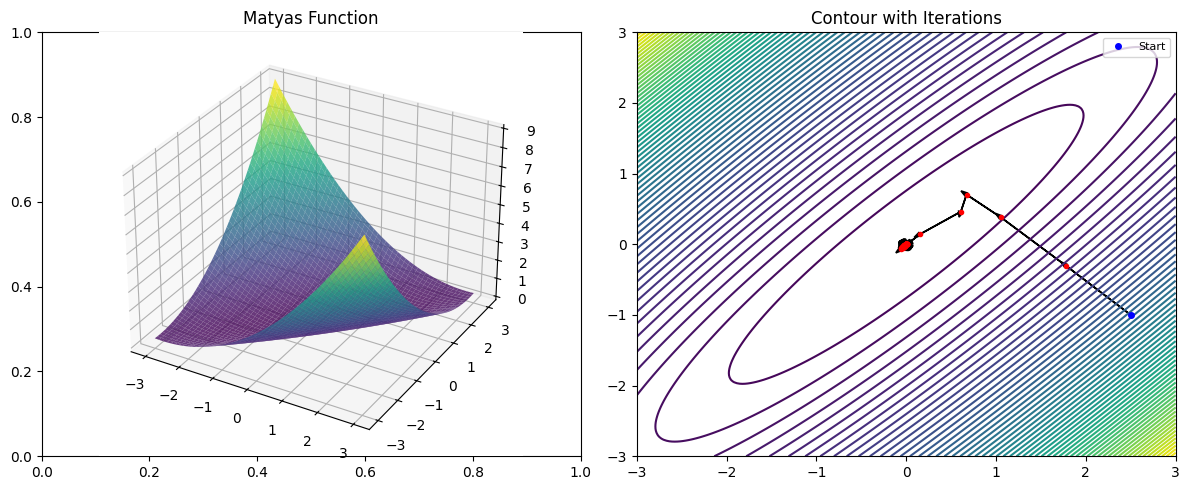

In [ ]:
# Matyas function (test function)

def f(x, y):
    return 0.26*(x**2 + y**2) - 0.48*x*y

def gradf(x, y):
    df_dx = 0.52*x - 0.48*y
    df_dy = 0.52*y - 0.48*x
    return np.array([df_dx, df_dy])

# Backtracking line search for adaptive alpha_k

def backtracking_line_search(xk, pk, gradfk, fk, rho=0.5, c=1e-4, alpha_init=1.0):
    alpha = alpha_init
    while f(xk[0] + alpha*pk[0], xk[1] + alpha*pk[1]) > fk + c*alpha*np.dot(gradfk, pk):
        alpha *= rho
    return alpha


# Initialization

xk = np.array([2.5, -1.0])   # starting point
fk = f(xk[0], xk[1])
gradfk = gradf(xk[0], xk[1])
k = 0

# Parameters for line search
alpha_init = 1.0
rho = 0.5
c = 1e-4
# coefficients
c1, c2, c3 = 0.6, 0.3, 0.1

# store previous directions
prev_p = []


# Plot setup

x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0] = plt.subplot(121, projection='3d')
ax[0].plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax[0].set_title("Matyas Function")
ax[1] = plt.subplot(122)
ax[1].contour(X, Y, Z, levels=80)
ax[1].plot(xk[0], xk[1], 'ro', markersize=4, label='Start', color = 'b')
ax[1].set_title("Contour with Iterations")


# Iteration header

print("iter        xk              yk              fk              alpha_k")
print("--------------------------------------------------------------------")
print(f"{k:3d}     {xk[0]:+.6f}     {xk[1]:+.6f}     {fk:3.8e}     {'-'}")


# Main iteration loop

KeepIterate = True
max_iter = 200

while KeepIterate and k < max_iter:
    gradfk = gradf(xk[0], xk[1])
    fk = f(xk[0], xk[1])

    # Determine direction
    if k < 3 or len(prev_p) < 3:
        pk = -gradfk / np.linalg.norm(gradfk)
    else:
        pk = c1*prev_p[-1] + c2*prev_p[-2] + c3*prev_p[-3]
        # ensure descent if direction is bad
        if np.dot(pk, gradfk) > 0:
            pk = -gradfk / np.linalg.norm(gradfk)

    # adaptive step length
    alpha = backtracking_line_search(xk, pk, gradfk, fk, rho, c, alpha_init)

    # update
    xknew = xk + alpha*pk
    fktest = f(xknew[0], xknew[1])

    # stop if function stops decreasing
    if fktest < fk:
        ax[1].plot(xknew[0], xknew[1], 'ro', markersize=3)
        ax[1].arrow(xk[0], xk[1], alpha*pk[0], alpha*pk[1],
                    head_width=0.05, head_length=0.08, fc='k', ec='k', linewidth=1.2)

        k += 1
        xk = xknew
        fk = fktest
        prev_p.append(pk)
        print(f"{k:3d}     {xk[0]:+.6f}     {xk[1]:+.6f}     {fk:3.8e}     {alpha:3.3e}")
    else:
        KeepIterate = False

plt.legend(loc="upper right", fontsize=8)
plt.tight_layout()
plt.show()


iter        xk              yk              fk              alpha_k
--------------------------------------------------------------------
  0     +0.000000     +1.000000     1.36000000e+02     -
  1     +0.131559     +1.482382     1.12074000e+02     5.000e-01
  2     +0.278349     +1.960349     8.86073547e+01     5.000e-01
  3     +0.459441     +2.426403     7.03581834e+01     5.000e-01
  4     +0.625289     +2.897663     6.35523668e+01     5.000e-01
  5     +1.067897     +2.665074     5.31312560e+01     5.000e-01
  6     +1.401326     +2.713503     4.30907857e+01     5.000e-01
  7     +1.750750     +2.719911     3.18125984e+01     5.000e-01
  8     +2.104694     +2.715025     2.09936994e+01     5.000e-01
  9     +2.455231     +2.718859     1.31837500e+01     5.000e-01
 10     +2.806679     +2.720334     1.04459628e+01     5.000e-01
 11     +2.778882     +2.221107     1.62386086e+00     5.000e-01
 12     +2.902692     +1.922397     5.86443868e-01     5.000e-01
 13     +3.013384     +1.9

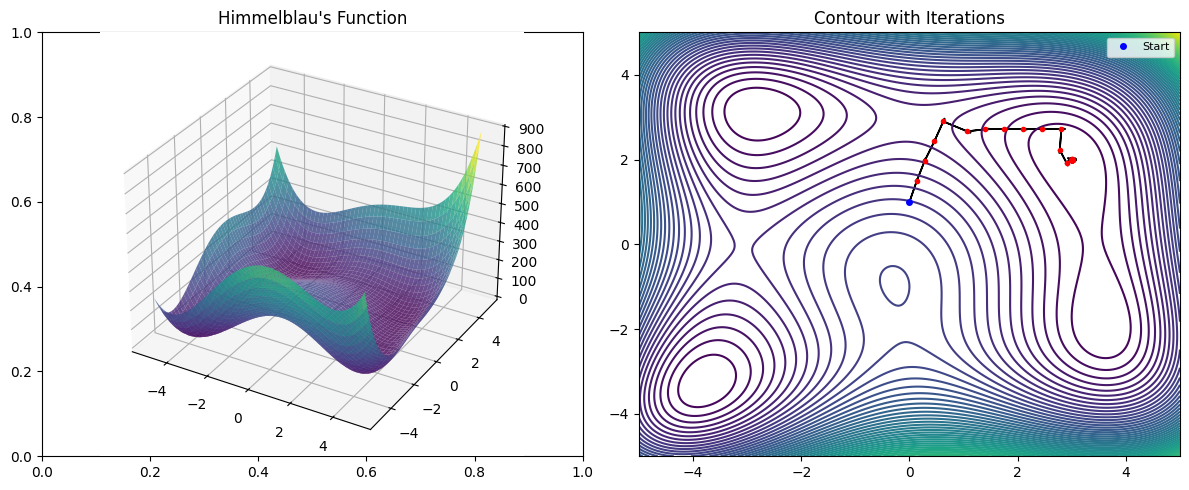

In [ ]:
# Himmelblau's function (test function)
def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def gradf(x, y):
    df_dx = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
    df_dy = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
    return np.array([df_dx, df_dy])

# Backtracking line search for adaptive alpha_k

def backtracking_line_search(xk, pk, gradfk, fk, rho=0.5, c=1e-4, alpha_init=1.0):
    alpha = alpha_init
    while f(xk[0] + alpha*pk[0], xk[1] + alpha*pk[1]) > fk + c*alpha*np.dot(gradfk, pk):
        alpha *= rho
    return alpha


# Initialization

xk = np.array([0.0, 1.0])   # starting point
fk = f(xk[0], xk[1])
gradfk = gradf(xk[0], xk[1])
k = 0

# Parameters for line search
alpha_init = 0.5
rho = 0.5
c = 1e-4
# coefficients
c1, c2, c3 = 0.6, 0.3, 0.1

# store previous directions
prev_p = []


# Plot setup

x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0] = plt.subplot(121, projection='3d')
ax[0].plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax[0].set_title("Himmelblau's Function")
ax[1] = plt.subplot(122)
ax[1].contour(X, Y, Z, levels=80)
ax[1].plot(xk[0], xk[1], 'ro', markersize=4, label='Start', color = 'b')
ax[1].set_title("Contour with Iterations")


# Iteration header

print("iter        xk              yk              fk              alpha_k")
print("--------------------------------------------------------------------")
print(f"{k:3d}     {xk[0]:+.6f}     {xk[1]:+.6f}     {fk:3.8e}     {'-'}")


# Main iteration loop

KeepIterate = True
max_iter = 200

while KeepIterate and k < max_iter:
    gradfk = gradf(xk[0], xk[1])
    fk = f(xk[0], xk[1])

    # Determine direction
    if k < 3 or len(prev_p) < 3:
        pk = -gradfk / np.linalg.norm(gradfk)
    else:
        pk = c1*prev_p[-1] + c2*prev_p[-2] + c3*prev_p[-3]
        # ensure descent if direction is bad
        if np.dot(pk, gradfk) > 0:
            pk = -gradfk / np.linalg.norm(gradfk)

    # adaptive step length
    alpha = backtracking_line_search(xk, pk, gradfk, fk, rho, c, alpha_init)

    # update
    xknew = xk + alpha*pk
    fktest = f(xknew[0], xknew[1])

    # stop if function stops decreasing
    if fktest < fk:
        ax[1].plot(xknew[0], xknew[1], 'ro', markersize=3)
        ax[1].arrow(xk[0], xk[1], alpha*pk[0], alpha*pk[1],
                    head_width=0.05, head_length=0.08, fc='k', ec='k', linewidth=1.2)

        k += 1
        xk = xknew
        fk = fktest
        prev_p.append(pk)
        print(f"{k:3d}     {xk[0]:+.6f}     {xk[1]:+.6f}     {fk:3.8e}     {alpha:3.3e}")
    else:
        KeepIterate = False

plt.legend(loc="upper right", fontsize=8)
plt.tight_layout()
plt.show()

# Problem 4

iter        xk              yk              fk              alpha_k
--------------------------------------------------------------------
  0     +0.000000     +1.000000     1.36000000e+02     -
  1     +0.131559     +1.482382     1.12074000e+02     5.000e-01
  2     +0.278349     +1.960349     8.86073547e+01     5.000e-01
  3     +0.459441     +2.426403     7.03581834e+01     5.000e-01
  4     +0.752384     +2.831599     6.09293425e+01     5.000e-01
  5     +1.237384     +2.710043     4.81837288e+01     5.000e-01
  6     +1.733834     +2.650573     3.16456603e+01     5.000e-01
  7     +2.220298     +2.535016     1.52093835e+01     5.000e-01
  8     +2.560259     +2.728795     1.19851291e+01     5.000e-01
  9     +2.743350     +2.263523     2.21682161e+00     5.000e-01
 10     +3.104475     +2.239040     2.01820131e+00     5.000e-01
 11     +2.918322     +2.072165     2.14133761e-01     2.500e-01
 12     +3.030412     +2.018746     5.20445218e-02     2.500e-01
 13     +2.973907     +1.9

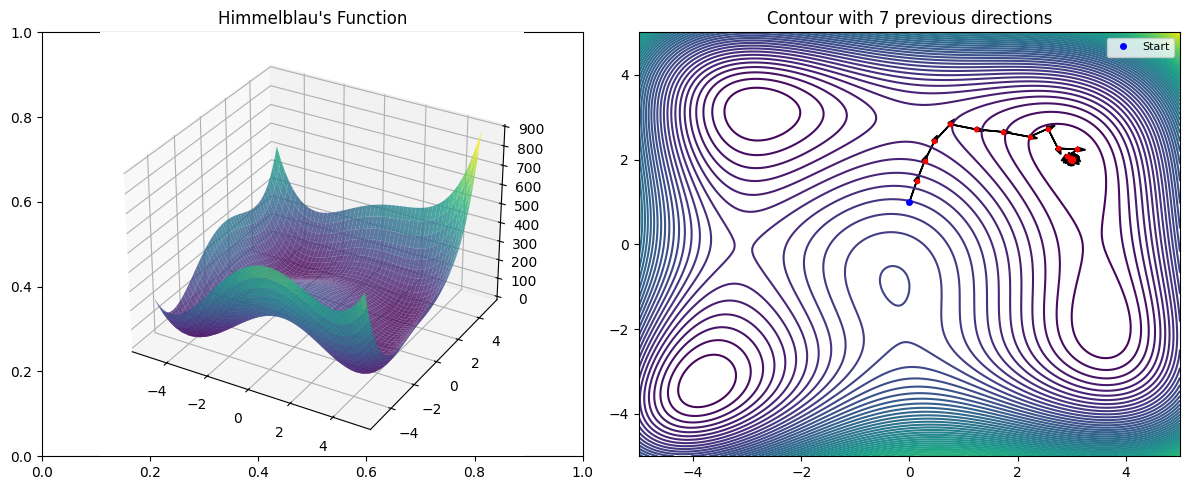

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Himmelblau's function (test function)

def f(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def gradf(x, y):
    df_dx = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
    df_dy = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
    return np.array([df_dx, df_dy])


# Backtracking line search for adaptive alpha_k

def backtracking_line_search(xk, pk, gradfk, fk, rho=0.5, c=1e-4, alpha_init=1.0):
    alpha = alpha_init
    while f(xk[0] + alpha*pk[0], xk[1] + alpha*pk[1]) > fk + c*alpha*np.dot(gradfk, pk):
        alpha *= rho
    return alpha


# Initialization

xk = np.array([0.0, 1.0])   # starting point
fk = f(xk[0], xk[1])
k = 0

alpha_init = 0.5
rho = 0.5
c = 1e-4

# Number of previous directions to combine
m = 7


# Plot setup

x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0] = plt.subplot(121, projection='3d')
ax[0].plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax[0].set_title("Himmelblau's Function")
ax[1] = plt.subplot(122)
ax[1].contour(X, Y, Z, levels=60)
ax[1].plot(xk[0], xk[1], 'ro', markersize=4, label="Start", color='b')
ax[1].set_title(f"Contour with {m} previous directions")


# Iteration header

print("iter        xk              yk              fk              alpha_k")
print("--------------------------------------------------------------------")
print(f"{k:3d}     {xk[0]:+.6f}     {xk[1]:+.6f}     {fk:3.8e}     {'-'}")


# Main iteration loop

prev_p = []
max_iter = 200
KeepIterate = True

while KeepIterate and k < max_iter:
    gradfk = gradf(xk[0], xk[1])
    fk = f(xk[0], xk[1])

    # Determine direction
    if len(prev_p) < m:
        pk = -gradfk / np.linalg.norm(gradfk)
    else:
        random_coeffs = np.random.rand(m)
        coeffs = random_coeffs / np.sum(random_coeffs)

        pk = np.zeros_like(prev_p[0])

        for i in range(1, m+1):
            pk += coeffs[i-1] * prev_p[-i]

        # descent direction
        if np.dot(pk, gradfk) > 0:
            pk = -gradfk / np.linalg.norm(gradfk)

    # Adaptive step length
    alpha = backtracking_line_search(xk, pk, gradfk, fk, rho, c, alpha_init)

    # Update
    xknew = xk + alpha * pk
    fktest = f(xknew[0], xknew[1])

    if fktest < fk:
        ax[1].plot(xknew[0], xknew[1], 'ro', markersize=3)
        ax[1].arrow(xk[0], xk[1], alpha*pk[0], alpha*pk[1],
                    head_width=0.1, head_length=0.15, fc='k', ec='k', linewidth=1.2)

        k += 1
        xk = xknew
        fk = fktest
        prev_p.append(pk)

        print(f"{k:3d}     {xk[0]:+.6f}     {xk[1]:+.6f}     {fk:3.8e}     {alpha:3.3e}")
    else:
        KeepIterate = False

plt.legend(loc="upper right", fontsize=8)
plt.tight_layout()
plt.show()
